In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [2]:
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [23]:
X = california.data[:, 0]
X = X.reshape(-1, 1)
X

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [24]:
y = california.target
y = y.reshape(-1, 1)
y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [25]:
def calculate_bias_variance(X_train, y_train, X_test, y_test):
    # Let us train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Bias is the error during training (y_test)
    bias = np.mean((y_test - np.mean(y_test_pred)) ** 2)
    variance = np.mean((y_test_pred - np.mean(y_test_pred)) ** 2)
    return bias, variance

In [30]:
biasvalues = []
variancevalues = []

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
bias, variance = calculate_bias_variance(X_train, y_train, X_test, y_test)
biasvalues.append(bias)
variancevalues.append(variance)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2)
bias, variance = calculate_bias_variance(X_train, y_train, X_test, y_test)
biasvalues.append(bias)
variancevalues.append(variance)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)
bias, variance = calculate_bias_variance(X_train, y_train, X_test, y_test)
biasvalues.append(bias)
variancevalues.append(variance)

IndexError: list index out of range

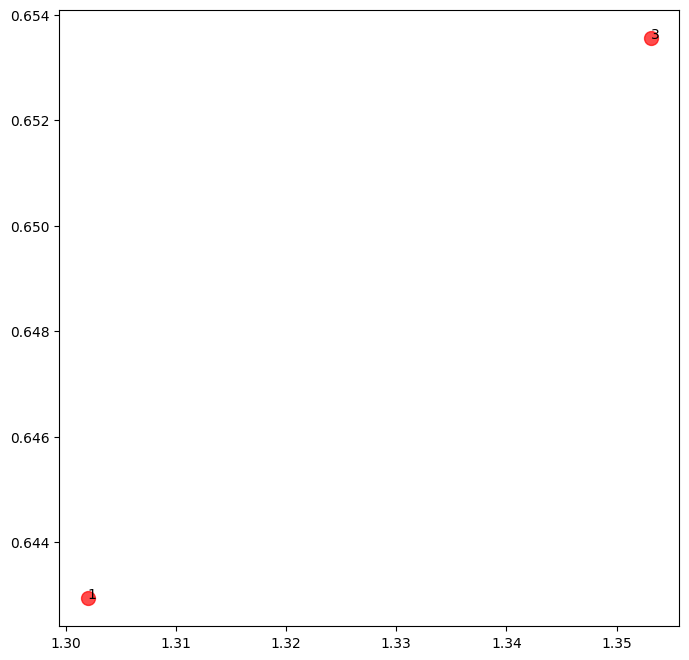

In [39]:
degrees = [1, 3, 10]
plt.figure(figsize=(8, 8))
plt.scatter(biasvalues, variancevalues, color='red', s=100, alpha=0.7)
for i, degree in enumerate(degrees):
    plt.text(biasvalues[i], variancevalues[i], degree)
    